# Importing Libraries.

In [1]:
import pandas as pd
import nltk
from ttp import ttp
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
p = ttp.Parser()
from langdetect import detect

# Reading CSV.

In [55]:
df = pd.read_csv('D:the_data.csv')

# Dropping 'lang' column.

In [56]:
df.drop(columns = 'lang',inplace=True)

# Creating Date column from Timestamp Data.

In [22]:
df['created_at'] = df['created_at'].astype('datetime64[ns]')
def timetodate(n):
    return n.date().strftime('%d-%m-%Y')
df['Date'] = df['created_at'].apply(timetodate)

# Dropping Miscellaneous Data.

In [5]:
#df.drop(df.index[1947:27644],inplace=True)

In [6]:
#indexNames = df[(df['Date'] == '2020-09-17') & (df['favorite_count'] > 1)].index
#df.drop(indexNames, inplace=True)

# Deleting Retweets.

In [57]:
def deleteRT(n):
    if 'RT' in n:
        n = ''
    return n

df['original_text'] = df['original_text'].apply(deleteRT)
df = df[df['original_text']!='']

In [58]:
len(df)

1293685

# Dropping Duplicate and Missing Values and Resetting the Index.

In [59]:
df = df.dropna()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [60]:
len(df)

1293685

# Detecting Hashtags from the Text.

In [9]:
def hashintext(n):
    return p.parse(n).tags
df['Hashtags'] = df['original_text'].apply(hashintext)

# Detecting Users from the Text.

In [10]:
def userintext(n):
    return p.parse(n).users
df['Mentions'] = df['original_text'].apply(userintext)

# Calculating length of Tweets.

In [11]:
def lenoftext(n):
    return len(n)

df['tweet_length'] = df['original_text'].apply(lenoftext)

# Cleaning the Text.

In [12]:
def del_xtra(text):
    z = re.sub(r'@','',text)
    z = re.sub(r'amp','',z)
    z = re.sub(r'&','',z)
    z = re.sub(r'#','',z)
    z = re.sub(r'RT[\s]+','',z)
    z = re.sub(r'https?:\/\/\S+','',z)
    z = re.sub(r'[^\w\s,]','',z)
    z = re.sub('&lt;/?[a-z]+&gt;', '', z)
    return z
df['clean_text'] = df['original_text'].apply(del_xtra)

# Tokenizing, deleting Stop Words, Punchuations and Detokenizing the Text.

In [45]:
def tokenthetext(n):
    return nltk.word_tokenize(n)
df['clean_text'] = df['clean_text'].apply(tokenthetext)

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_text'] = df['clean_text'].apply(lambda x: [item for item in x if item not in stop])
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word.isalpha()])

def detokenthetext(text):
    return nltk.tokenize.treebank.TreebankWordDetokenizer().detokenize(text)
df['clean_text'] = df['clean_text'].apply(detokenthetext)

In [63]:
df = df[df['author']!='propertiesindia']

In [64]:
aa = df['Date'].value_counts()
aa.sort_index(inplace=True)

In [65]:
aa

01-10-2020     29200
02-10-2020     41194
03-10-2020      1851
04-10-2020     39064
05-10-2020     34260
06-10-2020     38492
07-10-2020     33896
08-10-2020     54000
09-10-2020     32986
10-10-2020     36227
11-09-2020     39888
11-10-2020     37188
12-09-2020     40304
13-09-2020     40865
14-09-2020     36116
15-09-2020     53253
16-09-2020     48260
17-09-2020    120896
18-09-2020     52111
19-09-2020     54297
20-09-2020     39826
21-09-2020     37196
22-09-2020     36761
23-09-2020     36657
24-09-2020     35558
25-09-2020     37685
26-09-2020     37135
27-09-2020     41788
28-09-2020     35687
29-09-2020     34153
30-09-2020     37943
Name: Date, dtype: int64

# City to State Conversion

In [17]:
df['state'] = df['place'].str.lower()

In [18]:
state = pd.read_csv('D:indian city and state.csv')

In [19]:
state['Name of City'] = state['Name of City'].str.lower()
state.fillna(value='',inplace=True)

In [20]:
def citytostate(n):
    for x in range(len(state)):
        if state.loc[x,'Name of City'] in n or state.loc[x,'State'].lower() in n:
            n = state.loc[x,'State']
    return n
df['state'] = df['state'].apply(citytostate)

In [33]:
df

,id,created_at,source,original_text,author,favorite_count,place,Date,Hashtags,Mentions,tweet_length,clean_text,state
0,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,Falcons\nPrediction of Mr. Anderson about Sain...,PrinkaSakhala,1,Haveli,2020-09-20,[],[],140,Falcons Prediction Mr Anderson Saint Rampal Ji...,
1,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,"I am hurt at the core, I have learnt to be oka...",AbhiAshokGujar,0,Rajendra Nagar,2020-09-20,[],[],58,I hurt core I learnt okay,
2,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,@SarangSood @AdityaTodmal @SubhadipNandy @rohi...,TradingMonk_UJ,1,Allahabad,2020-09-20,[],"[SarangSood, AdityaTodmal, SubhadipNandy, rohi...",140,SarangSood AdityaTodmal SubhadipNandy vivbajaj...,
3,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,Devilliers This is kindest humanitarian gestur...,harshit5mi,1,Lucknow,2020-09-20,[],[],118,Devilliers This kindest humanitarian gesture T...,
4,1.307830e+18,2020-09-20 23:58:00,Twitter for Android,@DelhiJalBoard @ArvindKejriwal @AjayDutt48 @ra...,VinodPujari888,0,New Delhi,2020-09-20,[],"[DelhiJalBoard, ArvindKejriwal, AjayDutt48, ra...",128,DelhiJalBoard ArvindKejriwal rameshbidhuri PMO...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343798,1.308558e+18,2020-09-23 00:03:40,Twitter for iPhone,Happy birthday to princes sir ❤️ https://t.co/...,AjazkhanActor,129,Mumbai,2020-09-23,[],[],56,Happy birthday princes sir,
343799,1.308557e+18,2020-09-23 00:03:12,Twitter for Android,[Baqarah 2:146] Those to whom We gave the Book...,syedfarzansmart,1,Hyderabad,2020-09-23,[],[],140,Baqarah Those We gave Books recognise Prophet ...,
343800,1.308557e+18,2020-09-23 00:03:05,Twitter for Android,@Idea @VodafoneIN @AdityaBirlaGrp\nI am succes...,kulkarniavinas7,0,Maharashtra,2020-09-23,[],"[Idea, VodafoneIN, AdityaBirlaGrp]",140,Idea VodafoneIN AdityaBirlaGrp I successfully ...,
343801,1.308557e+18,2020-09-23 00:02:45,Twitter for Android,Day 23\n\nAhhh https://t.co/29HPhgCKon,hitch_nishachr,1,Lucknow,2020-09-23,[],[],36,Day Ahhh,


# General Analysis

<AxesSubplot:>

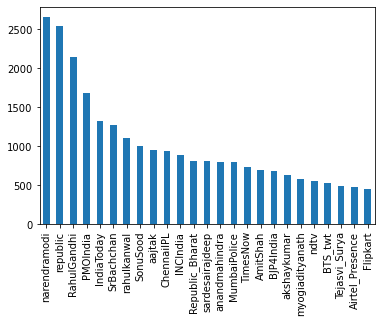

In [48]:
s = df['Mentions'].explode()
s.dropna(inplace=True)
s.value_counts().nlargest(25).plot(kind='bar')

<AxesSubplot:>

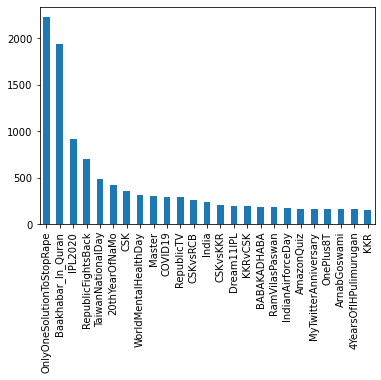

In [49]:
h = df['Hashtags'].explode()
h.dropna(inplace=True)
h.value_counts().nlargest(25).plot(kind='bar')

<AxesSubplot:>

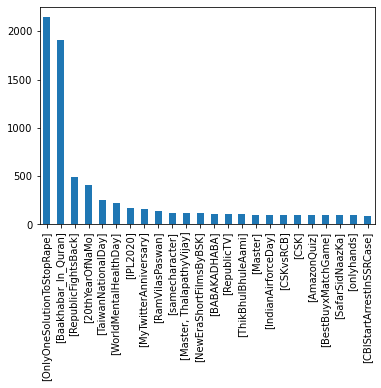

In [50]:
df['Hashtags'].value_counts().nlargest(25)[1:].plot(kind='bar')

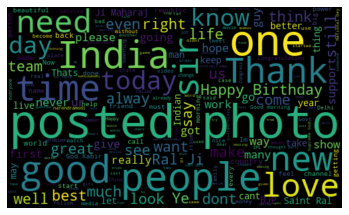

In [51]:
allWords = ''.join([twts for twts in df['clean_text']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='source'>

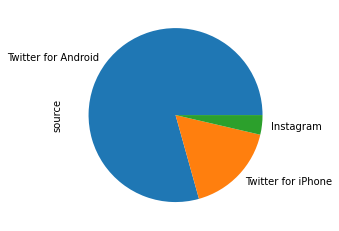

In [26]:
df['source'].value_counts().nlargest(3).plot.pie()

<AxesSubplot:ylabel='Density'>

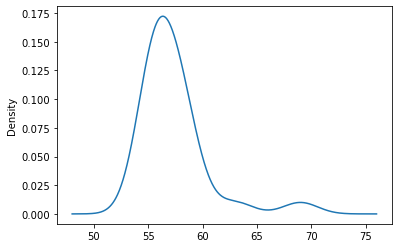

In [27]:
df['created_at'].value_counts().nlargest(25).plot(kind='kde')

In [28]:
df['state'].value_counts()

    343803
Name: state, dtype: int64

<AxesSubplot:>

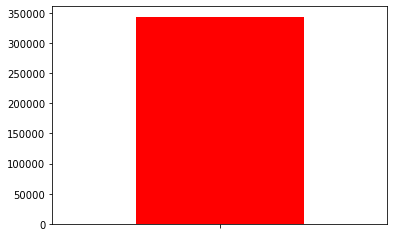

In [29]:
df['state'].value_counts().sort_values().nlargest(25).plot(kind='bar',color='red')

<AxesSubplot:>

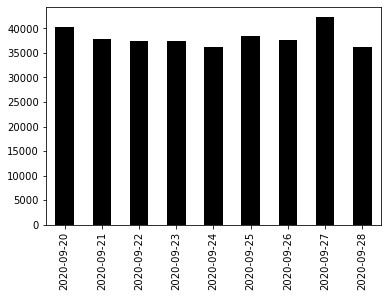

In [30]:
df['Date'].value_counts().sort_index().plot(kind='bar',color='black')

# Parsing DataFrame to CSV

In [31]:
df.to_csv('D:CleanTwitterData.csv')

In [32]:
df.head(100)

,id,created_at,source,original_text,author,favorite_count,place,Date,Hashtags,Mentions,tweet_length,clean_text,state
0,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,Falcons\nPrediction of Mr. Anderson about Sain...,PrinkaSakhala,1,Haveli,2020-09-20,[],[],140,Falcons Prediction Mr Anderson Saint Rampal Ji...,
1,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,"I am hurt at the core, I have learnt to be oka...",AbhiAshokGujar,0,Rajendra Nagar,2020-09-20,[],[],58,I hurt core I learnt okay,
2,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,@SarangSood @AdityaTodmal @SubhadipNandy @rohi...,TradingMonk_UJ,1,Allahabad,2020-09-20,[],"[SarangSood, AdityaTodmal, SubhadipNandy, rohi...",140,SarangSood AdityaTodmal SubhadipNandy vivbajaj...,
3,1.307830e+18,2020-09-20 23:59:00,Twitter for Android,Devilliers This is kindest humanitarian gestur...,harshit5mi,1,Lucknow,2020-09-20,[],[],118,Devilliers This kindest humanitarian gesture T...,
4,1.307830e+18,2020-09-20 23:58:00,Twitter for Android,@DelhiJalBoard @ArvindKejriwal @AjayDutt48 @ra...,VinodPujari888,0,New Delhi,2020-09-20,[],"[DelhiJalBoard, ArvindKejriwal, AjayDutt48, ra...",128,DelhiJalBoard ArvindKejriwal rameshbidhuri PMO...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.307830e+18,2020-09-20 23:37:00,Twitter for Android,Press freedom is not a license to indulge in e...,ChepurRao,0,Hayathnagar,2020-09-20,[],[arvindgunasekar],95,Press freedom license indulge espionage arvind...,
96,1.307830e+18,2020-09-20 23:36:00,Twitter for Android,@Shatrug74477813 @murugavell @koolvicky now..b...,julurusrinivas1,1,Vishakhapatnam,2020-09-20,[],"[Shatrug74477813, murugavell, koolvicky]",65,murugavell koolvicky,
97,1.307830e+18,2020-09-20 23:36:00,Twitter for Android,#SaintRampalJi\nPrediction of Mr. Anderson abo...,Kalpesh2971980,1,Chhota Udepur,2020-09-20,[SaintRampalJi],[],140,SaintRampalJi Prediction Mr Anderson Saint Ram...,
98,1.307830e+18,2020-09-20 23:36:00,Twitter for Android,@danger_jaatni Prophecy of Nostradamus about S...,Anushka_499,2,Madhya Pradesh,2020-09-20,[],[danger_jaatni],139,Prophecy Nostradamus Saint Rampal Ji Maharaj T...,
